In [1]:
import struct
import matplotlib.pyplot as plt
import numpy as np

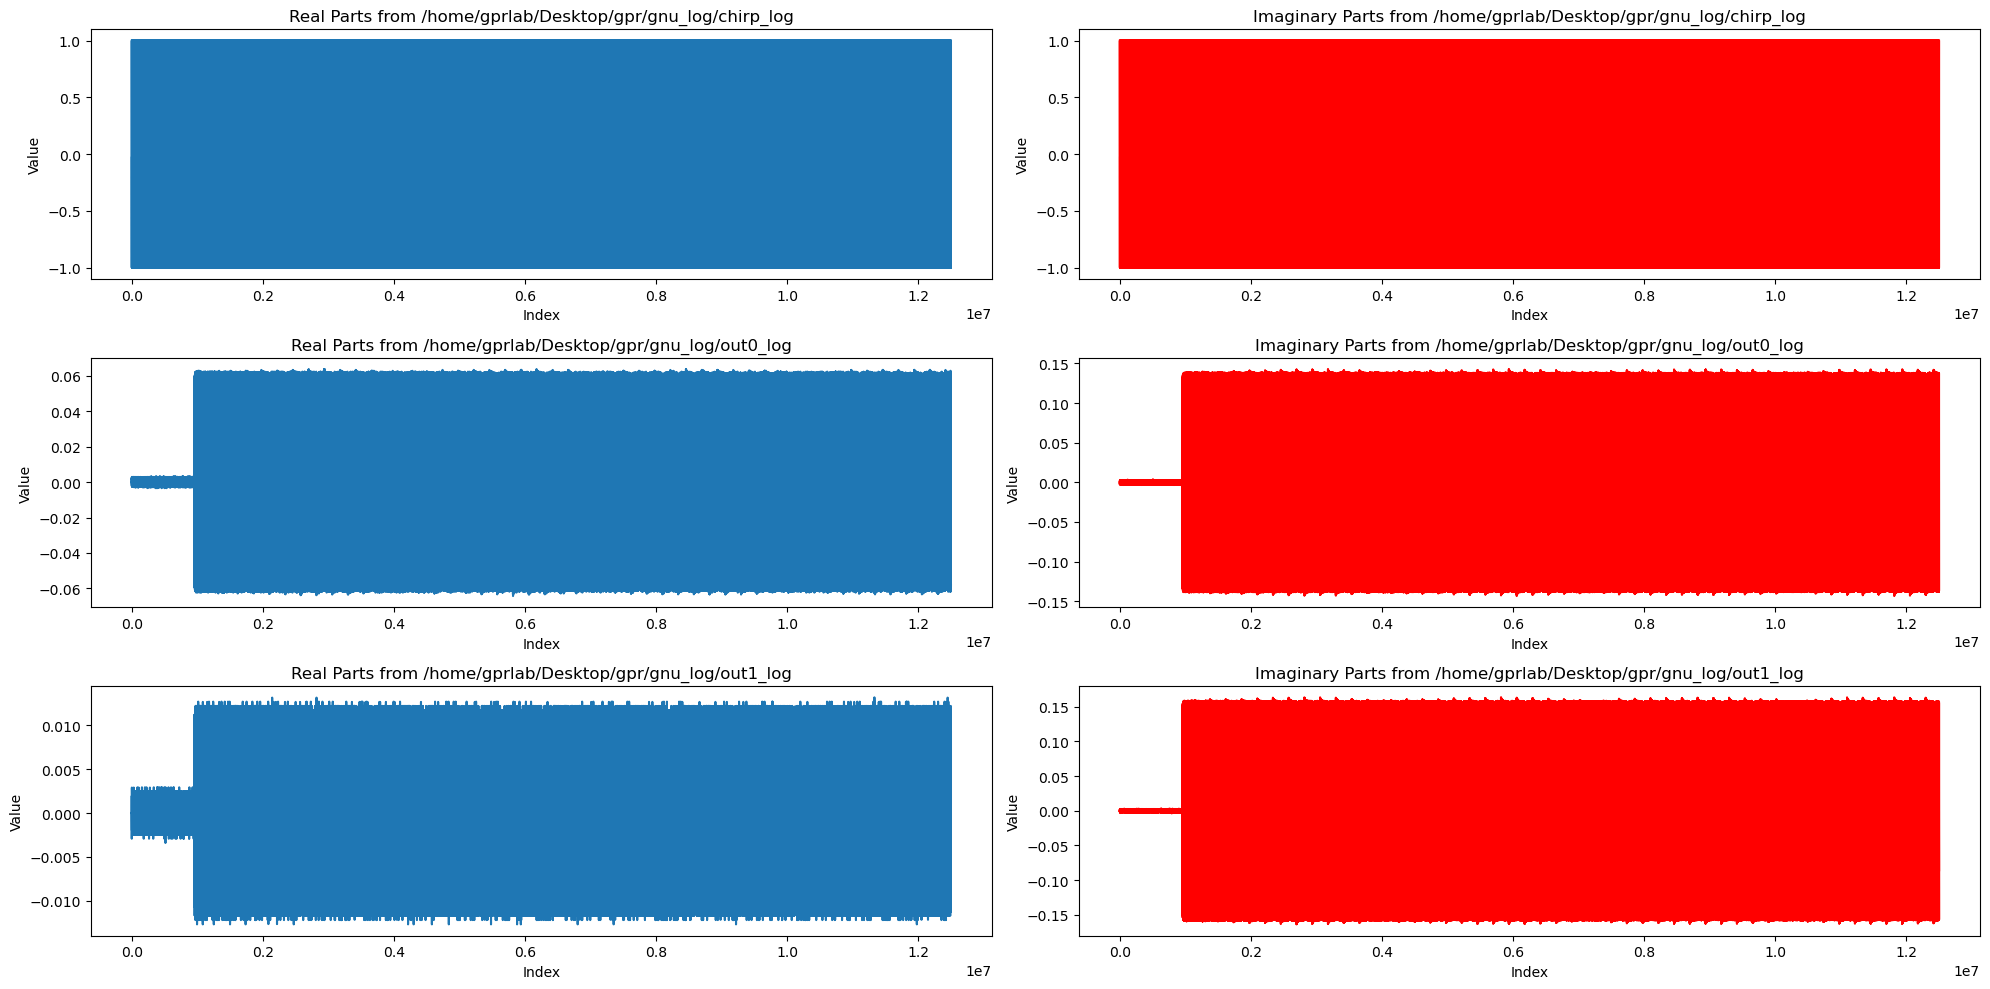

In [2]:
#Test ID
test_id = "01"

# List of file names
file_names = ["/home/gprlab/Desktop/gpr/gnu_log/chirp_log", "/home/gprlab/Desktop/gpr/gnu_log/out0_log", "/home/gprlab/Desktop/gpr/gnu_log/out1_log"]

# Create a new figure
plt.figure(figsize=(20, 10))

for i, file_name in enumerate(file_names, 1):
    with open(file_name, "rb") as file:
        data = file.read(100000000)

    # Number of complex numbers = total bytes / bytes per complex number
    num_complex_numbers = len(data) // 8
    floats = struct.unpack(f'<{2*num_complex_numbers}f', data)

    # Separate the real and imaginary parts
    real_parts = floats[::2]
    imaginary_parts = floats[1::2]

    #real_parts = real_parts[1200000:1201000]
    #imaginary_parts = imaginary_parts[1200000:1201000]

    # Create a subplot for each file and plot real and imaginary parts
    plt.subplot(len(file_names), 2, 2*i-1)
    plt.plot(real_parts, label='Real')
    plt.title(f'Real Parts from {file_name}')
    plt.xlabel('Index')
    plt.ylabel('Value')

    plt.subplot(len(file_names), 2, 2*i)
    plt.plot(imaginary_parts, label='Imaginary', color='red')
    plt.title(f'Imaginary Parts from {file_name}')
    plt.xlabel('Index')
    plt.ylabel('Value')

# Ensure a clean layout
plt.tight_layout()

#Save plot

plt.savefig(f"real_complex_plots_{test_id}.png")

# Display the plots
plt.show()

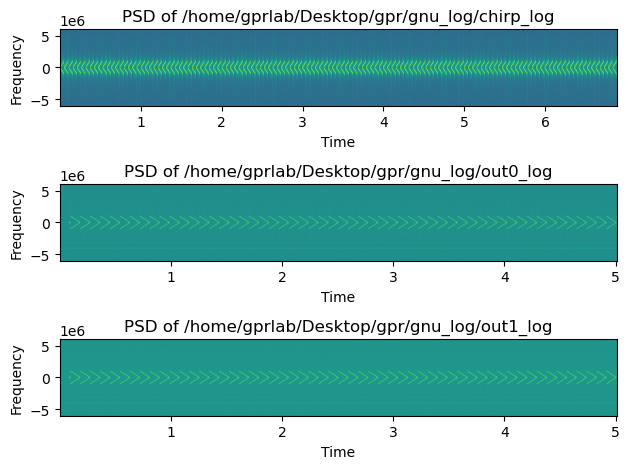

In [3]:
file_names = ["/home/gprlab/Desktop/gpr/gnu_log/chirp_log", "/home/gprlab/Desktop/gpr/gnu_log/out0_log", "/home/gprlab/Desktop/gpr/gnu_log/out1_log"]

f, ax = plt.subplots(len(file_names))

for i, file_name in enumerate(file_names, 1):    
    
    dat = np.fromfile(open(file_name), dtype="complex64")# Create a subplot for each file
    
    ax[i-1].specgram(dat, NFFT=1024, Fs=12000000)
    ax[i-1].set_title(f"PSD of {file_name}")
    ax[i-1].set_xlabel("Time")
    ax[i-1].set_ylabel("Frequency")

plt.tight_layout()
f.tight_layout()    
plt.show()

In [4]:
dat = np.fromfile(open("/home/gprlab/Desktop/gpr/gnu_log/chirp_log"), dtype="complex64")# Create a subplot for each file

/home/gprlab/miniconda3/envs/gprdev/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


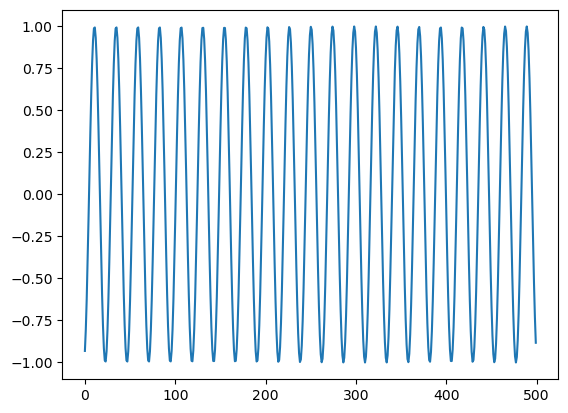

In [5]:
plt.plot(np.arange(len(dat[1200000:1200500])), dat[1200000:1200500])